# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [0, 1, 1, 0, 1]

y_predictions = [0.1, 0.9, 0.4, 0.6, 0.61]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme()

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
# !gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
# !gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
# !gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

In [60]:
PREFIX = "./data/homework_03/"

data = pd.read_csv(f"https://github.com/fromelicks/dls/raw/main/data/homework_03/train.csv")

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = ["ClientPeriod", "MonthlySpending", "TotalSpent"]

# Категориальные признаки
cat_cols = [
    "Sex",
    "IsSeniorCitizen",
    "HasPartner",
    "HasChild",
    "HasPhoneService",
    "HasMultiplePhoneNumbers",
    "HasInternetService",
    "HasOnlineSecurityService",
    "HasOnlineBackup",
    "HasDeviceProtection",
    "HasTechSupportAccess",
    "HasOnlineTV",
    "HasMovieSubscription",
    "HasContractPhone",
    "IsBillingPaperless",
    "PaymentMethod",
]

feature_cols = num_cols + cat_cols
target_col = "Churn"

In [6]:
# YOUR CODE

data.filter(cat_cols + [target_col]).apply(pd.unique, axis="index")

Sex                                                            [Male, Female]
IsSeniorCitizen                                                        [0, 1]
HasPartner                                                          [Yes, No]
HasChild                                                            [Yes, No]
HasPhoneService                                                     [Yes, No]
HasMultiplePhoneNumbers                           [No, Yes, No phone service]
HasInternetService                                     [No, Fiber optic, DSL]
HasOnlineSecurityService                       [No internet service, No, Yes]
HasOnlineBackup                                [No internet service, No, Yes]
HasDeviceProtection                            [No internet service, No, Yes]
HasTechSupportAccess                           [No internet service, Yes, No]
HasOnlineTV                                    [No internet service, No, Yes]
HasMovieSubscription                           [No internet serv

In [7]:
# YOUR CODE

data.filter(cat_cols + [target_col]).apply(pd.unique, axis="index").map(len).to_dict()  # type: ignore

{'Sex': 2,
 'IsSeniorCitizen': 2,
 'HasPartner': 2,
 'HasChild': 2,
 'HasPhoneService': 2,
 'HasMultiplePhoneNumbers': 3,
 'HasInternetService': 3,
 'HasOnlineSecurityService': 3,
 'HasOnlineBackup': 3,
 'HasDeviceProtection': 3,
 'HasTechSupportAccess': 3,
 'HasOnlineTV': 3,
 'HasMovieSubscription': 3,
 'HasContractPhone': 3,
 'IsBillingPaperless': 2,
 'PaymentMethod': 4,
 'Churn': 2}

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

В `TotalSpent` есть 9 невалидных значений. Конвертируем в `np.float64` и дропнем NaNы:

In [9]:
data.loc[:, "TotalSpent"] = pd.to_numeric(data.loc[:, "TotalSpent"], errors="coerce")
data = data.dropna()
data = data.astype({"TotalSpent": np.float64})
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlineTV  

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, если вы сможете это сделать на одном графике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

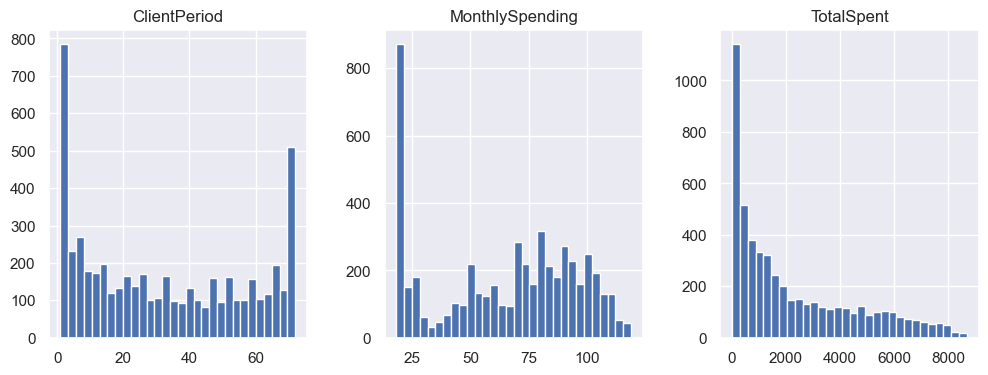

In [10]:
# YOUR CODE
data.filter(num_cols).hist(layout=(1, 3), figsize=(12, 4), bins=30)
plt.show()

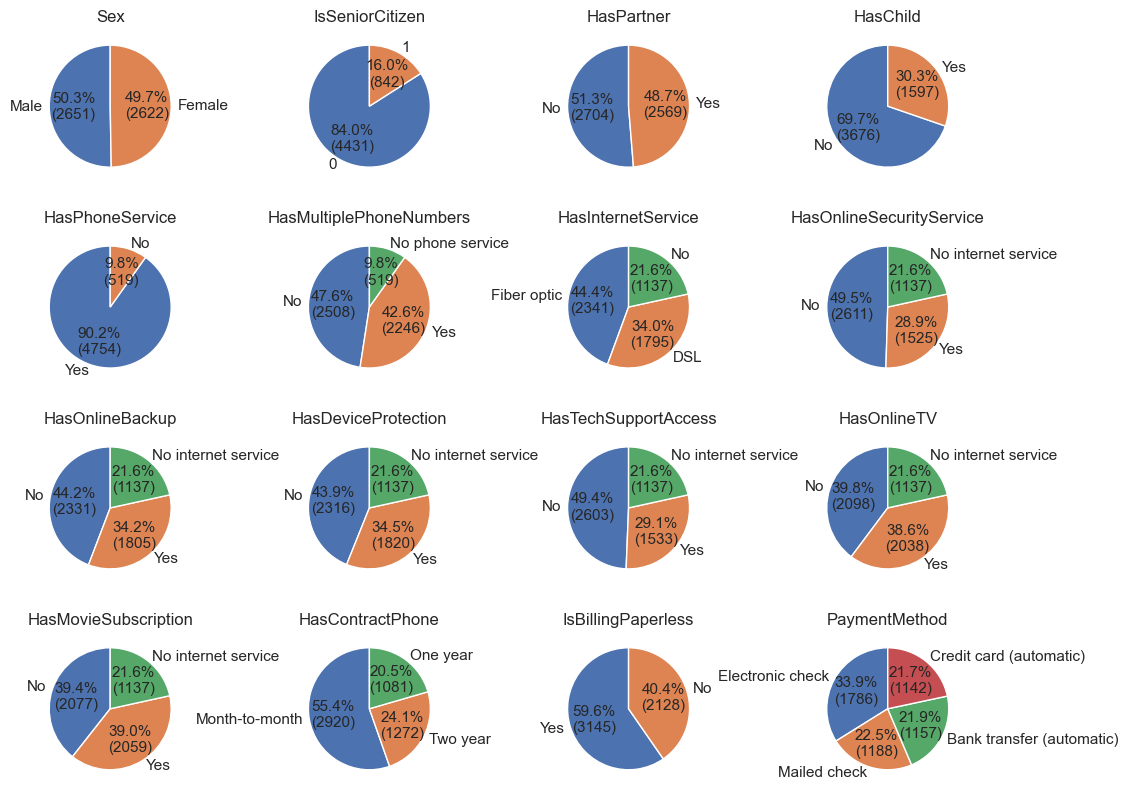

In [11]:
from typing import Callable


def autopct_format(values) -> Callable[..., str]:
    def my_format(pct) -> str:
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return "{:.1f}%\n({v:d})".format(pct, v=val)

    return my_format


from matplotlib.axes import Axes

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(12, 10))

list(iter(axs))
i = 0
for ax_row in axs:
    for ax in ax_row:
        ax: Axes
        cat_col = data.filter(cat_cols).iloc[:, i].value_counts()
        cat_col.plot.pie(
            ax=ax,
            rotatelabels=False,
            startangle=90,
            autopct=autopct_format(cat_col),
            textprops={"fontsize": 11},
        )  # type: ignore
        i += 1
        ax.set_ylabel("")
        ax.set_title(cat_col.index.name)
plt.subplots_adjust(wspace=0.7)
plt.show()

Как видно из распределения целевой переменной, классы являются несбалансированными.

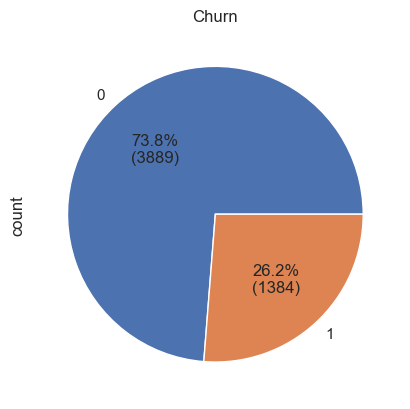

In [12]:
t_data = data[target_col].value_counts()
t_data.plot.pie(title=target_col, autopct=autopct_format(t_data))  # type: ignore
plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [13]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scoring='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно использовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа превращаем в one-hot вектора.)

In [14]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    StandardScaler,
    RobustScaler,
    LabelEncoder,
    OneHotEncoder,
    OrdinalEncoder
)
from sklearn.pipeline import make_pipeline, Pipeline

In [15]:
# YOUR CODE
X = data[num_cols + cat_cols]
y = data[target_col]

preprocessor = ColumnTransformer(
    [
        ("numerical", RobustScaler(), num_cols),
        ("categorical", OneHotEncoder(), cat_cols),
    ]
)

pipe = Pipeline([("pre", preprocessor), ("clf", LogisticRegression(max_iter=2000))])

param_grid = [
    {
        "clf__C": [2000, 1000, 500, 100, 10, 1, 0.1, 0.01, 0.001],
        "clf__solver": [
            "lbfgs",
            "liblinear",
            "newton-cg",
            "newton-cholesky",
            "sag",
            "saga",
        ],
    }
]

grid = GridSearchCV(pipe, param_grid, scoring="roc_auc", refit=True, n_jobs=-1)
grid.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         RobustScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('categorical',
                                                                         OneHotEncoder(),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'HasMultiplePhoneNumbers',
                                                                          'HasInternetService',
                                                                          'HasOnlineSecurityService',
                                                                          'HasOnlineBackup',
                                                                          'HasDeviceProtection',
                                                                          'HasTechSupportAccess',
                                                                          'HasOnlineTV',
                                                                          'HasMovieSubscription',
                                                                          'HasContractPhone',
                                                                          'IsBillingPaperless',
                                                                          'PaymentMethod'])])),
                                       ('clf',
                                        LogisticRegression(max_iter=2000))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [2000, 1000, 500, 100, 10, 1, 0.1, 0.01,
                                     0.001],
                          'clf__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                          'newton-cholesky', 'sag', 'saga']}],
             scoring='roc_auc')

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [16]:
grid.best_score_, grid.best_params_

(0.8448524927348275, {'clf__C': 100, 'clf__solver': 'sag'})

Лучшее качество: 0.845
Лучшие параметры: $C = 100$

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [33]:
# YOUR CODE
from catboost import CatBoostClassifier, Pool, cv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
cat = CatBoostClassifier(custom_loss="PRAUC", verbose=False)

cat.fit(
    pd.DataFrame(X_train, columns=X.columns), y_train, cat_features=cat_cols, plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [18]:
roc_auc_score(cat.predict(X_test), y_test)

0.7412355663012213

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV


train_data = Pool(
    data=pd.DataFrame(X_train, columns=X.columns), label=y_train, cat_features=cat_cols
)
eval_dataset = Pool(
    data=pd.DataFrame(X_test, columns=X.columns), label=y_test, cat_features=cat_cols
)

cat = CatBoostClassifier(loss_function="CrossEntropy", silent=True, random_seed=4)

grid = {
    "iterations": [100, 150, 200],
    "learning_rate": [0.1, 0.2, 0.5],
    "max_depth": [4, 6, 10],
    "l2_leaf_reg": [2, 3, 4],
}

# grid_search_result = cat.grid_search(grid, X=train_data, plot=True, verbose=False)
cat_grid = HalvingGridSearchCV(cat, grid, cv=4, scoring="roc_auc", refit=True, verbose=1)  # type: ignore

cat_grid.fit(
    pd.DataFrame(X_train, columns=X.columns),
    y_train,
    cat_features=cat_cols,
    use_best_model=True,
    eval_set=eval_dataset,
)

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

In [44]:
cat_grid.best_params_, cat_grid.best_score_

({'iterations': 150, 'l2_leaf_reg': 4, 'learning_rate': 0.1, 'max_depth': 4},
 0.8474791633995835)

In [45]:
cat_best = CatBoostClassifier(
    custom_loss="PRAUC", verbose=False, **cat_grid.best_params_
)

cat_best.fit(
    pd.DataFrame(X_train, columns=X.columns),
    y_train,
    cat_features=cat_cols,
    use_best_model=True,
    eval_set=eval_dataset,
)

ВАШ ОТВЕТ

In [46]:
roc_auc_score(cat_best.predict(X_test), y_test)

0.7704640864599431

**ROC-AUC** моего решения на закрытом тесте равен $0.8521208350838638$.

# Предсказания

In [47]:
best_model = cat_best # какая-то предыдущая модель

In [61]:
X_validate = pd.read_csv(
    "https://github.com/fromelicks/dls/raw/main/data/homework_03/test.csv"
)
submission = pd.read_csv(
    "https://github.com/fromelicks/dls/raw/main/data/homework_03/submission.csv"
)

submission["Churn"] = best_model.predict_proba(X_validate)[:, 1]
submission.to_csv(f"{PREFIX}my_submission.csv", index=False)

Лучшее решение отправьте в Stepik.